In [3]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [4]:
# Activation functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0.01*x, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Derivatives:

def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

In [3]:
# Learning rate 0.001

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.001

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_001 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_001[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_001 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_001[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_001 = pd.DataFrame(y_pred_001.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8675289769591719, True value = 0.858141088749273
Test sample 2: Predicted value = 0.738699879794494, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5227365474679723, True value = 0.52073145970559
Test sample 4: Predicted value = 0.7698506917237329, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6774908603754882, True value = 0.686946558999973
Test sample 6: Predicted value = 0.18161137793663867, True value = 0.238208247061194
Test sample 7: Predicted value = 0.6094339305289966, True value = 0.570792671980758
Test sample 8: Predicted value = 0.696355473409461, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6589484834669949, True value = 0.641783571475397
Test sample 10: Predicted value = 0.6031066849459227, True value = 0.577834316643059
Test sample 11: Predicted value = 0.632467054866841, True value = 0.659659889572103
Test sample 12: Predicted value = 0.839078030494217, True value = 0.820854240

In [4]:
# Learning rate 0.01

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_01 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_01[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_01 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_01[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_01 = pd.DataFrame(y_pred_01.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8587223032364942, True value = 0.858141088749273
Test sample 2: Predicted value = 0.6018625903255665, True value = 0.575002039578945
Test sample 3: Predicted value = 0.49431585069058703, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8376611563686405, True value = 0.888929186843236
Test sample 5: Predicted value = 0.691554048494346, True value = 0.686946558999973
Test sample 6: Predicted value = 0.22917241034852875, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5448216833425549, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7831577476787589, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6467183576683001, True value = 0.641783571475397
Test sample 10: Predicted value = 0.600234309379128, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6735980995832309, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8058775366898969, True value = 0.820854

In [5]:
# Learning rate 0.1

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_1[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1 = pd.DataFrame(y_pred_1.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
  
 # End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8534212346350233, True value = 0.858141088749273
Test sample 2: Predicted value = 0.6040046296037461, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5329904423357222, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8387752044648704, True value = 0.888929186843236
Test sample 5: Predicted value = 0.7028096034162996, True value = 0.686946558999973
Test sample 6: Predicted value = 0.22777898135081018, True value = 0.238208247061194
Test sample 7: Predicted value = 0.6001924728339847, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7538063667786579, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6526341115325437, True value = 0.641783571475397
Test sample 10: Predicted value = 0.6015398152240995, True value = 0.577834316643059
Test sample 11: Predicted value = 0.683855068474861, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8371124542548044, True value = 0.820854

0.0010328266380479655
0.00016704158182036618
8.799688053984858e-05


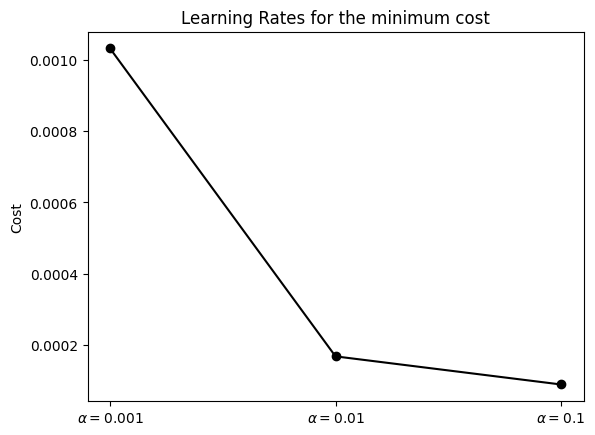

In [6]:
# Graphs for learning rate:
print(np.min(J_001))
print(np.min(J_01))
print(np.min(J_1))

plt.plot([1, 2, 3],[np.min(J_001),np.min(J_01),np.min(J_1)],color = 'black',marker = 'o')
# Add title and labels to the plot
plt.title('Learning Rates for the minimum cost')
# Set custom tick labels on the x-axis with LaTeX formatting
plt.xticks([1, 2, 3],[r'$\alpha = 0.001$', r'$\alpha = 0.01$', r'$\alpha = 0.1$'])
plt.ylabel('Cost')
plt.show()

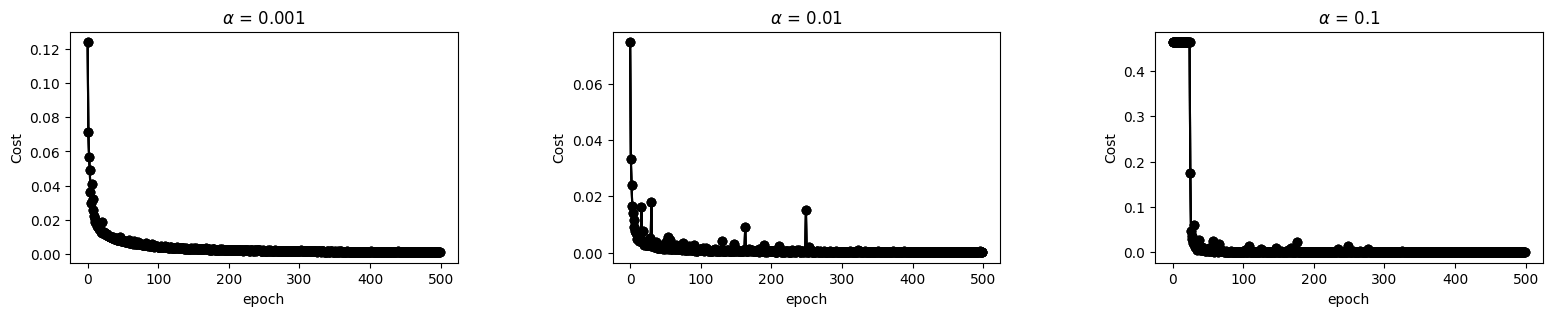

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,3))

for ax in enumerate(axes.flatten()):
    axes[0].plot(range(epochs),J_001,color='black',marker = 'o')
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel('Cost')
    axes[0].set_title(r'$\alpha$ = 0.001')
    
    axes[1].plot(range(epochs),J_01,color='black',marker='o')
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel('Cost')
    axes[1].set_title(r'$\alpha$ = 0.01')
    
    axes[2].plot(range(epochs),J_1,color='black',marker='o')
    axes[2].set_xlabel("epoch")
    axes[2].set_ylabel('Cost')
    axes[2].set_title(r'$\alpha$ = 0.1')
    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

In [20]:
# Epochs: 100, 200, 300, 400, 500

# For learning rate a = 0.01:
print(format(J_01[99],".5f"))
print(format(J_01[199],".5f"))
print(format(J_01[299],".5f"))
print(format(J_01[399],".5f"))
print(format(J_01[499],".5f"))

# For learning rate a = 0.1:
print('\n',format(J_1[99],".5f"))
print(format(J_1[199],".5f"))
print(format(J_1[299],".5f"))
print(format(J_1[399],".5f"))
print(format(J_1[499],".5f"))

0.00140
0.00048
0.00032
0.00020
0.00023

 0.00065
0.00020
0.00017
0.00018
0.00026


In [27]:
# Learning rate 0.1

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 100

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_1[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1_100 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1_100[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1_100 = pd.DataFrame(y_pred_1_100.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_100.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_100.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_100.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
  
 # End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.865348342709409, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5909910578829515, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5209121553190741, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8221604894517831, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6968802572631712, True value = 0.686946558999973
Test sample 6: Predicted value = 0.20522837611774272, True value = 0.238208247061194
Test sample 7: Predicted value = 0.6039702227259981, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7501286279384878, True value = 0.770014093496705
Test sample 9: Predicted value = 0.726845764485459, True value = 0.641783571475397
Test sample 10: Predicted value = 0.6252184982515476, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6786795338608499, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8603209751690808, True value = 0.8208542

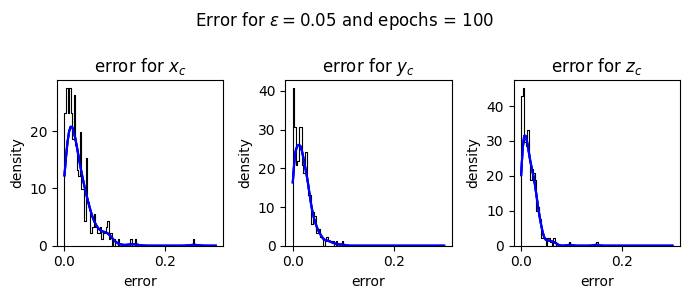

In [28]:
import numpy as np

y_pred_array = y_pred_1_100.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_100 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1_100.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_100 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1_100.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_100 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_100)
    n, x, _ = axes[0].hist(diff_1_100, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_100)
    n, x, _ = axes[1].hist(diff_2_100, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_100)
    n, x, _ = axes[2].hist(diff_3_100, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ and epochs = 100 ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [29]:
print(format(np.min(diff_1_100),".5f"))
print(format(np.min(diff_2_100),".5f"))
print(format(np.min(diff_3_100),".5f"))


print(format(np.max(diff_1_100),".5f"))
print(format(np.max(diff_2_100),".5f"))
print(format(np.max(diff_3_100),".5f"))


print(format(np.mean(diff_1_100),".5f"))
print(format(np.mean(diff_2_100),".5f"))
print(format(np.mean(diff_3_100),".5f"))


print(format(np.var(diff_1_100),".5f"))
print(format(np.var(diff_2_100),".5f"))
print(format(np.var(diff_3_100),".5f"))

0.00018
0.00011
0.00018
0.25689
0.09903
0.14899
0.02822
0.02058
0.01719
0.00074
0.00028
0.00025


In [30]:
# Learning rate 0.1

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 200

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J_1[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1_200 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1_200[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1_200 = pd.DataFrame(y_pred_1_200.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_200.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_200.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1_200.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
  
 # End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8613440810046142, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5930484770421379, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5098684813667367, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8401557577570212, True value = 0.888929186843236
Test sample 5: Predicted value = 0.7047161715900623, True value = 0.686946558999973
Test sample 6: Predicted value = 0.17742467798931102, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5788356158372705, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7360921407355252, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6463773028483069, True value = 0.641783571475397
Test sample 10: Predicted value = 0.5737936221759801, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6801287521706587, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8416686515482514, True value = 0.82085

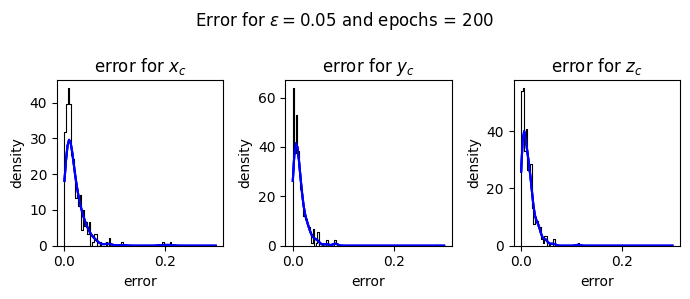

In [33]:
import numpy as np

y_pred_array = y_pred_1_200.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_200 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1_200.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_200 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1_200.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_200 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_200)
    n, x, _ = axes[0].hist(diff_1_200, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_200)
    n, x, _ = axes[1].hist(diff_2_200, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_200)
    n, x, _ = axes[2].hist(diff_3_200, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ and epochs = 200')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [32]:
print(format(np.min(diff_1_200),".5f"))
print(format(np.min(diff_2_200),".5f"))
print(format(np.min(diff_3_200),".5f"))


print(format(np.max(diff_1_200),".5f"))
print(format(np.max(diff_2_200),".5f"))
print(format(np.max(diff_3_200),".5f"))


print(format(np.mean(diff_1_200),".5f"))
print(format(np.mean(diff_2_200),".5f"))
print(format(np.mean(diff_3_200),".5f"))


print(format(np.var(diff_1_200),".5f"))
print(format(np.var(diff_2_200),".5f"))
print(format(np.var(diff_3_200),".5f"))

0.00011
0.00001
0.00016
0.20948
0.08600
0.11272
0.01974
0.01396
0.01414
0.00050
0.00020
0.00018
